<a href="https://colab.research.google.com/github/absaruddins/Absaruddin15/blob/main/HearDPCHATbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas scikit-learn xgboost lightgbm streamlit pyngrok matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=';')

Saving cardio_train.csv to cardio_train.csv


In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.shape


(70000, 13)

In [ ]:
print(df['cardio'].value_counts())

cardio
0    35021
1    34979
Name: count, dtype: int64


In [ ]:
df.isnull().any().any()

np.False_

<ipython-input-8-faddfc525cca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cardio', palette='viridis', edgecolor='black')


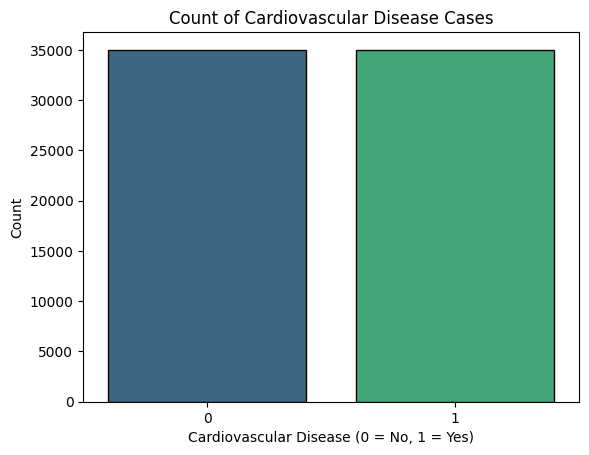

In [ ]:
sns.countplot(data=df, x='cardio', palette='viridis', edgecolor='black')

# Add labels and title for clarity (optional)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Count of Cardiovascular Disease Cases')

# Show the plot
plt.show()

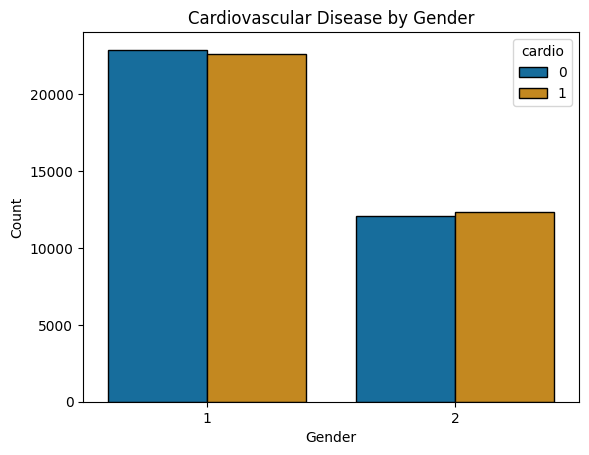

In [ ]:
sns.countplot(x='gender', hue='cardio', data=df, palette='colorblind', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cardiovascular Disease by Gender')
# Show the plot
plt.show()

In [ ]:
df.drop(columns=['id'], inplace=True, errors='ignore')
df['age'] = df['age'] // 365
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
print(df)

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       50       2     168    62.0    110     80            1     1      0   
1       55       1     156    85.0    140     90            3     1      0   
2       51       1     165    64.0    130     70            3     1      0   
3       48       2     169    82.0    150    100            1     1      0   
4       47       1     156    56.0    100     60            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995   52       2     168    76.0    120     80            1     1      1   
69996   61       1     158   126.0    140     90            2     2      0   
69997   52       2     183   105.0    180     90            3     1      0   
69998   61       1     163    72.0    135     80            1     2      0   
69999   56       1     170    72.0    120     80            2     1      0   

       alco  active  cardio        BMI  
0         0       1   

In [ ]:
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI']]
y = df['cardio']
#feature_names = X.columns.tolist()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

results = {}

# Random Forest
rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_proba = rf.predict_proba(X_test_scaled)[:, 1]
results['Random Forest'] = {
    'Accuracy (%)': round(accuracy_score(y_test, rf_pred) * 100, 2),
    'AUC (%)': round(roc_auc_score(y_test, rf_proba) * 100, 2)
}

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_proba = dt.predict_proba(X_test_scaled)[:, 1]
results['Decision Tree'] = {
    'Accuracy (%)': round(accuracy_score(y_test, dt_pred) * 100, 2),
    'AUC (%)': round(roc_auc_score(y_test, dt_proba) * 100, 2)
}

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_proba = xgb.predict_proba(X_test_scaled)[:, 1]
results['XGBoost'] = {
    'Accuracy (%)': round(accuracy_score(y_test, xgb_pred) * 100, 2),
    'AUC (%)': round(roc_auc_score(y_test, xgb_proba) * 100, 2)
}

# LightGBM
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb.fit(X_train_scaled, y_train)
lgb_pred = lgb.predict(X_test_scaled)
lgb_proba = lgb.predict_proba(X_test_scaled)[:, 1]
results['LightGBM'] = {
    'Accuracy (%)': round(accuracy_score(y_test, lgb_pred) * 100, 2),
    'AUC (%)': round(roc_auc_score(y_test, lgb_proba) * 100, 2)
}

# Show results
import pandas as pd
pd.DataFrame(results).T


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 24485, number of negative: 24515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499694 -> initscore=-0.001224
[LightGBM] [Info] Start training from score -0.001224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Accuracy (%),AUC (%)
Random Forest,72.73,78.92
Decision Tree,72.64,78.22
XGBoost,73.51,79.96
LightGBM,73.40,80.05


In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('dt', dt),
    ('xgb', xgb),
    ('lgb', lgb)
], voting='soft', weights=[2, 1, 2, 2])

ensemble.fit(X_train_scaled, y_train)
ensemble_pred = ensemble.predict(X_test_scaled)
ensemble_proba = ensemble.predict_proba(X_test_scaled)[:, 1]

# Add to results
results['Ensemble Model'] = {
    'Accuracy (%)': round(accuracy_score(y_test, ensemble_pred) * 100, 2),
    'AUC (%)': round(roc_auc_score(y_test, ensemble_proba) * 100, 2)
}

# Display updated results
pd.DataFrame(results).T


# Display results
print(pd.DataFrame(results).T)

# Save model and files
with open("heart_model.pkl", "wb") as f:
    pickle.dump(ensemble, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("feature_names.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 24485, number of negative: 24515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499694 -> initscore=-0.001224
[LightGBM] [Info] Start training from score -0.001224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                Accuracy (%)  AUC (%)
Random Forest          72.73    78.92
Decision Tree          72.64    78.22
XGBoost                73.51    79.96
LightGBM               73.40    80.05
Ensemble Model         73.38    79.92


<ipython-input-14-171050d8bc52>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-171050d8bc52>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


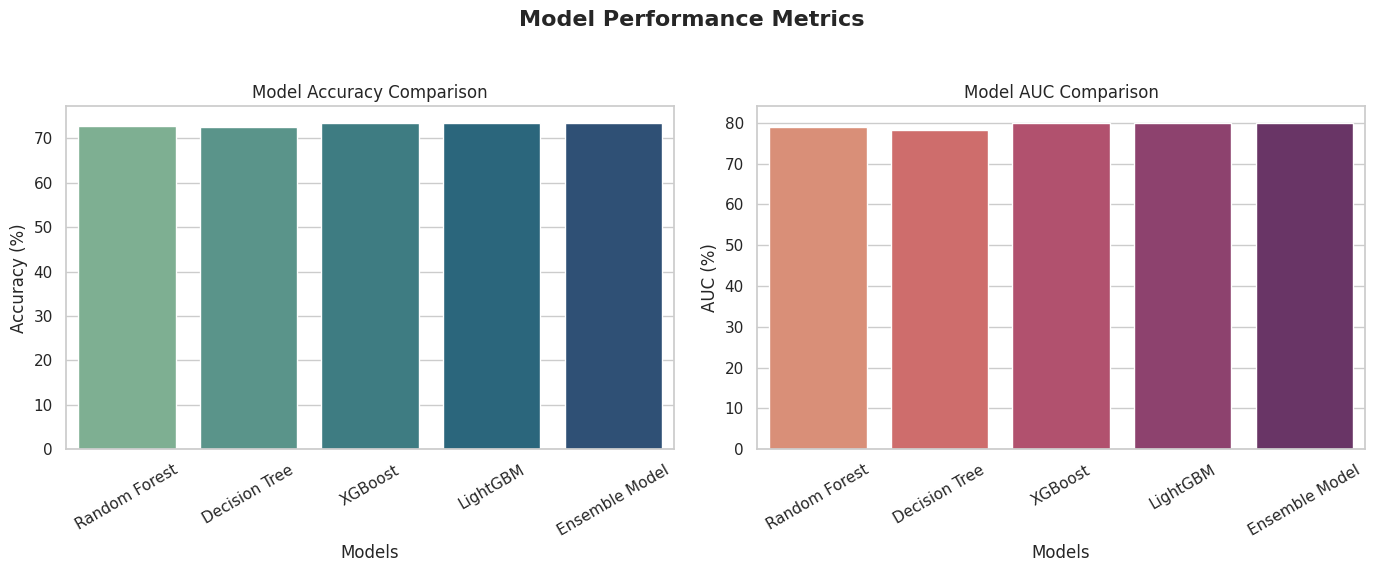

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results).T
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#plot 1
sns.barplot(
    x=results_df.index,
    y='Accuracy (%)',
    data=results_df.reset_index(),
    palette='crest',
    ax=axes[0]
)
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('Models')
axes[0].tick_params(axis='x', rotation=30)

#plot 2

sns.barplot(
    x=results_df.index,
    y='AUC (%)',
    data=results_df.reset_index(),
    palette='flare',
    ax=axes[1]
)
axes[1].set_title('Model AUC Comparison')
axes[1].set_ylabel('AUC (%)')
axes[1].set_xlabel('Models')
axes[1].tick_params(axis='x', rotation=30)

#final adjustmet and combined plot in 1 frame
plt.suptitle('Model Performance Metrics', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
code = '''
import streamlit as st
import pandas as pd
import pickle


st.set_page_config(page_title="AI Heart Risk Chatbot", page_icon="🫀")
st.title("🩺 AI Doctor – Heart Disease Risk Predictor")

# Load model, scaler, and feature names
try:
    with open("heart_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    with open("feature_names.pkl", "rb") as f:
        feature_names = pickle.load(f)
except Exception as e:
    st.error(f"❌ Model or scaler files not found. Error: {e}")
    st.stop()

# Input fields
age = st.slider("Age (Years)", min_value=18, max_value=100, value=30)
gender = st.selectbox("Gender (1 = Female, 2 = Male)", [1, 2])
height = st.number_input("Height (cm)", min_value=120, max_value=250, value=170)
weight = st.number_input("Weight (kg)", min_value=40, max_value=200, value=70)
ap_hi = st.number_input("Systolic Blood Pressure", min_value=80, max_value=200, value=120)
ap_lo = st.number_input("Diastolic Blood Pressure", min_value=40, max_value=150, value=80)
cholesterol = st.selectbox("Cholesterol Level", [1, 2, 3], format_func=lambda x: {1: "1 = Normal", 2: "2 = Above Normal", 3: "3 = High"}[x])
gluc = st.selectbox("Glucose Level", [1, 2, 3], format_func=lambda x: {1: "1 = Normal", 2: "2 = Above Normal", 3: "3 = High"}[x])
smoke = st.selectbox("Do you smoke?", [0, 1], format_func=lambda x: "No" if x else "Yes")
alco = st.selectbox("Do you consume alcohol?", [0, 1], format_func=lambda x: "No" if x else "Yes")
active = st.selectbox("Are you physically active?", [0, 1], format_func=lambda x: "Yes" if x else "No")

# Predict button
if st.button("Predict Heart Risk"):
    bmi = weight / ((height / 100) ** 2)

    input_data = pd.DataFrame([{
        'age': age,
        'gender': gender,
        'height': height,
        'weight': weight,
        'ap_hi': ap_hi,
        'ap_lo': ap_lo,
        'cholesterol': cholesterol,
        'gluc': gluc,
        'smoke': smoke,
        'alco': alco,
        'active': active,
        'BMI': bmi
    }])

    try:
        input_data = input_data[feature_names]
        scaled = scaler.transform(input_data)
        prob = model.predict_proba(scaled)[0][1] * 100
        pred = model.predict(scaled)[0]

        if pred == 1:
            st.error(f"⚠️ **High Risk of Heart Disease**\\n\\nEstimated Risk: **{prob:.2f}%**")
        else:
            st.success(f"✅ **Low Risk of Heart Disease**\\n\\nEstimated Risk: **{prob:.2f}%**")
    except Exception as e:
        st.error(f"❌ Prediction failed. Error: {e}")
'''
with open("app.py", "w") as f:
    f.write(code)

In [ ]:
import os, time
from pyngrok import ngrok

os.system("pkill -f streamlit")
os.system("pkill -f ngrok")

ngrok.set_auth_token("2st3WIbu17MqV3hWhnbzS3aztct_4rx46yMzJJaRXNGDFbiuj")
os.system("nohup streamlit run app.py &")
time.sleep(10)

public_url = ngrok.connect(8501)
print(f"✅ Chatbot running at: {public_url}")

✅ Chatbot running at: NgrokTunnel: "https://a170-35-243-247-231.ngrok-free.app" -> "http://localhost:8501"
